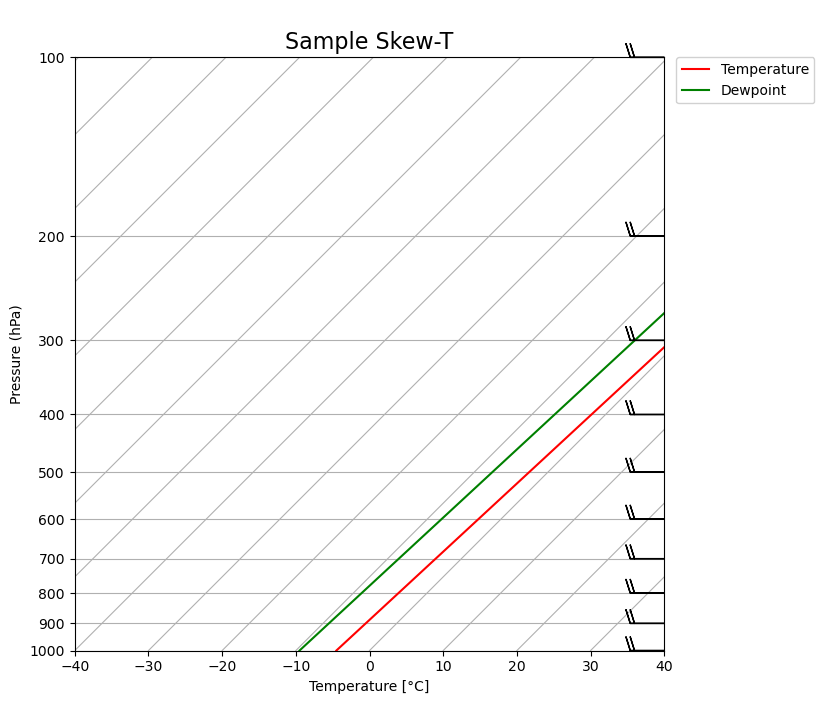

In [1]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
from metpy.calc import wind_components
import numpy as np

# --------------------------
# Example synthetic sounding
# --------------------------
pressure = np.linspace(1000, 100, 37) * units.hPa

# Temperature in degC (absolute units)
temperature = (15 * units.degC) - (6.5 * np.log10(pressure.magnitude) * units.delta_degC)
temperature = temperature.to(units.degC)  # convert delta_degC to degC

dewpoint = (temperature - 5 * units.delta_degC).to(units.degC)

# Wind: 20 kt from 270° at all levels
wind_speed = 20 * np.ones_like(pressure) * units.knots
wind_dir = 270 * np.ones_like(pressure) * units.degrees

# --------------------------
# Create the Skew-T figure
# --------------------------
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot temperature and dewpoint
skew.plot(pressure, temperature, 'r', label='Temperature')
skew.plot(pressure, dewpoint, 'g', label='Dewpoint')

# Plot wind barbs at thinned levels for readability (every 4th level)
thin = slice(None, None, 4)  # every 4th point
u, v = wind_components(wind_speed, wind_dir)
skew.plot_barbs(pressure[thin], u[thin], v[thin])

# Set axis limits
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 40)

# Labels
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlabel('Temperature [°C]')  # X-axis label with degree symbol and label

# Titles and legend (placed outside to the right)
skew.ax.set_title('Sample Skew-T', fontsize=16)
# Shrink the axis on the right to make room for the legend
fig.subplots_adjust(right=0.78)
# Place legend outside the axes on the right
skew.ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0., framealpha=0.9)

# Save figure
plt.savefig('../figures/skewt_sample.png', dpi=150, bbox_inches='tight')
plt.show()
